# BREAST CANCER PREDICTION

In [49]:
# importing libraries

#  For data manipulation
import pandas as pd
import numpy as np

#  for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#  for model building
from select_classifier.select_model import Model_Selector

from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#  fot satistical test
import scipy
from scipy import stats

# for data preprocessing
from sklearn.preprocessing import StandardScaler

#  for pca
from sklearn.decomposition import PCA


#  for logging
import logging

logging_str="[%(asctime)s:%(levelname)s:%(model)s]%(message)s"
logging.basicConfig(filename='activity.log',level=logging.INFO,format=logging_str)

from tqdm import tqdm

# metrics related packages
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,plot_confusion_matrix,classification_report

### Approach

**1) EDA**
- Checking Granularity
- Fixing the data types
- Checking importance of each categotical and numerical features
- Missing value treatment
- Outlier treatment

**2) Feature engineering**
- Scaling
- Transformtion(if required)

**3) Model building**

**4) Model evaluation**


In [2]:
#  maxclomn view
pd.set_option('display.max_columns',None)

In [3]:
# Reading data
df=pd.read_csv(r'data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Granularity

- The Observations are at each id level

In [5]:
assert len(df)==df['id'].nunique()  # one observation for one id

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
# Droping unneccessary columns
df1=df.copy()
df1.drop(['id','Unnamed: 32'],axis=1,inplace=True)

### Checking datatypes

In [8]:
df1.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

- All features have correct datatype

#### Whether each features related to target?

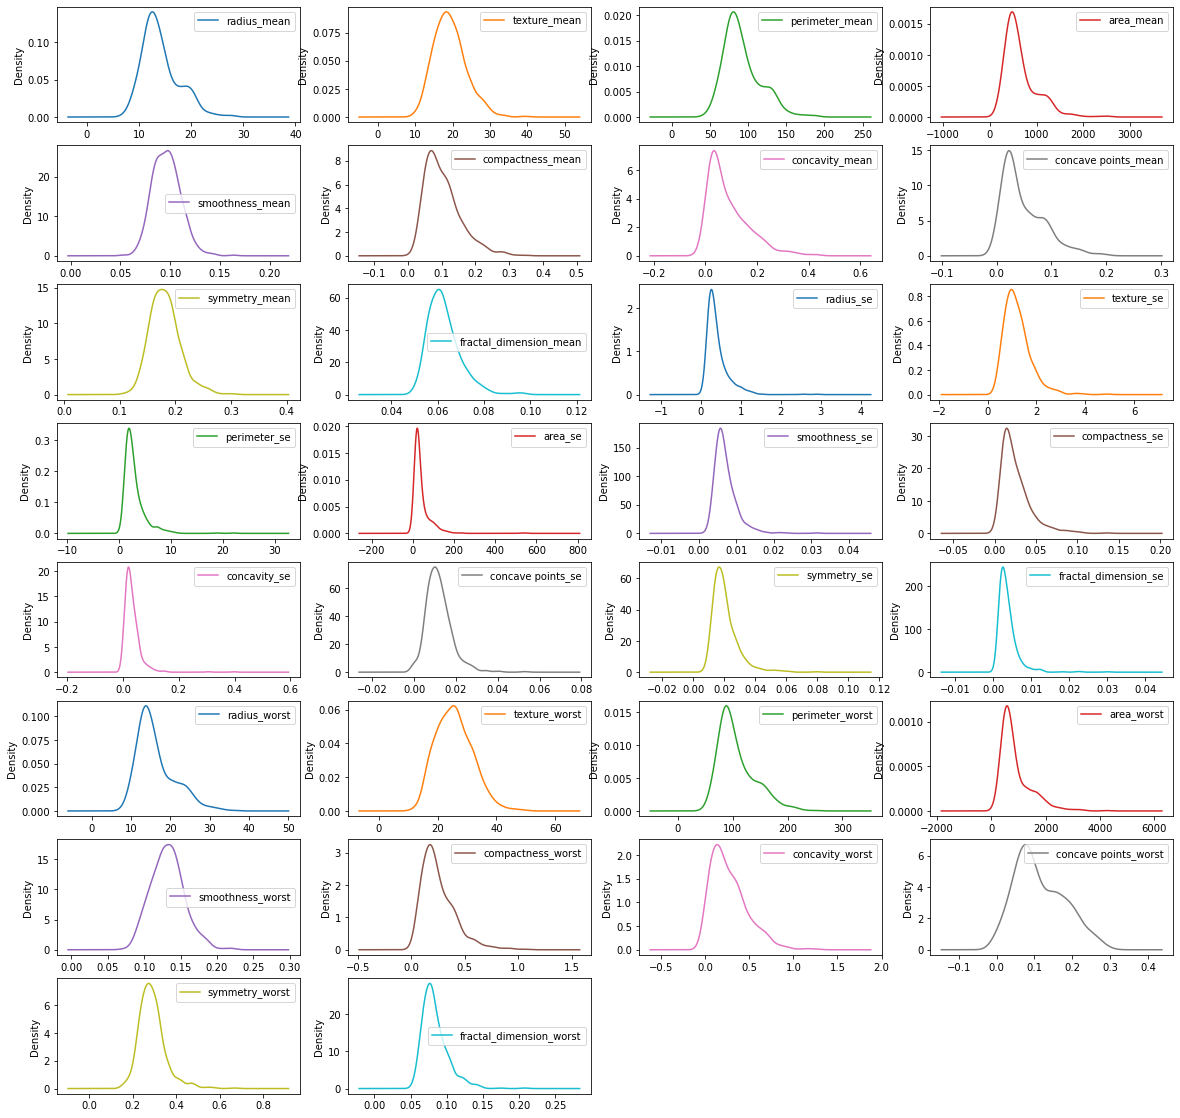

In [9]:
# checking distribution o each features
df1.plot(kind='kde',sharex=False,subplots=True,layout=(-1,4),figsize=(20,20))
plt.show()

##### - Almost all features are near normal

- To check whether each features are related to target we will do ttest
- Same thing can be checked throgh visualization

In [10]:
# defining function to check the relationship between numerical and categorical features
def feature_relation(num_features,cat_feature,df):
    imp=[]
    not_imp=[]
    for i in num_features:
        d1=df[df[cat_feature]=='M'][i]
        d2=df[df[cat_feature]=='B'][i]
        t_stat,p=stats.ttest_ind(d1,d2)
        
        if p<0.05:
            print(f'{num_features} is related to target----------->')
            imp.append(i)
        else:
            print(f'{num_features} is NOT related to target')
            not_imp.append(i)

    return imp,not_imp

In [11]:
num_features_=df1.select_dtypes(include=np.number).columns
num_features_

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
df1.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
imp_features,not_imp_features=feature_relation(num_features_,'diagnosis',df1)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object') is related to target----------->
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave po

In [14]:
imp_features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [15]:
not_imp_features

['fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'symmetry_se',
 'fractal_dimension_se']

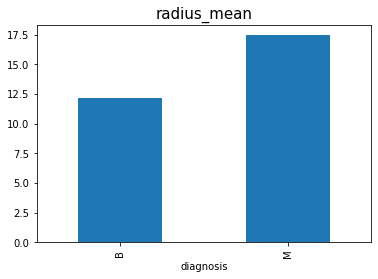

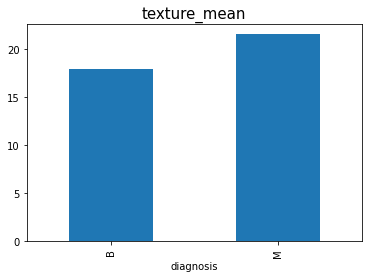

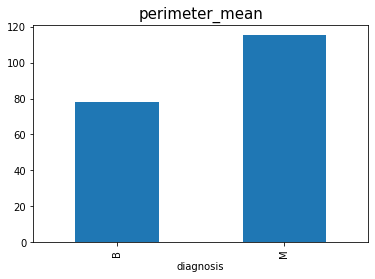

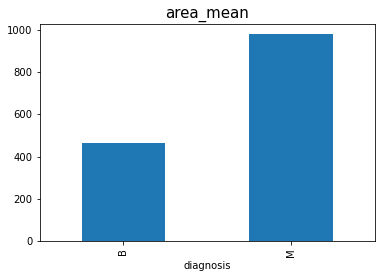

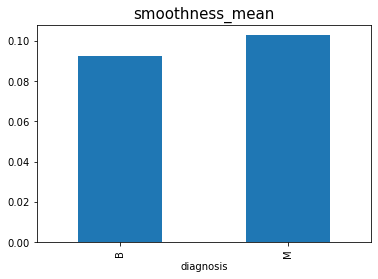

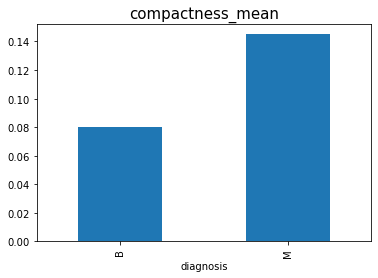

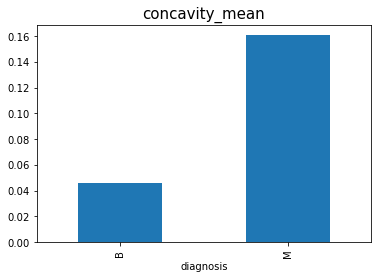

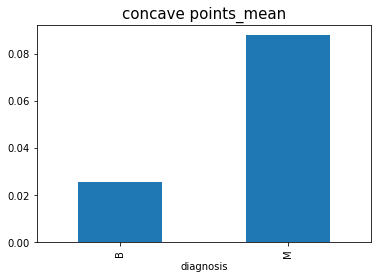

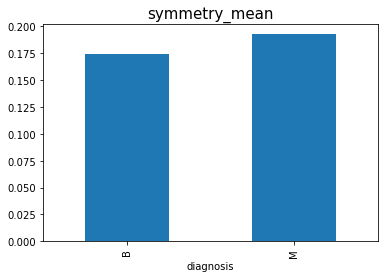

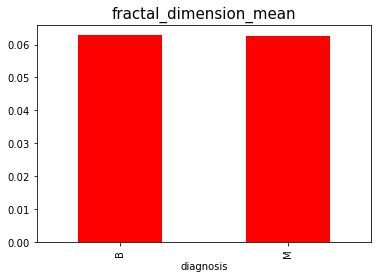

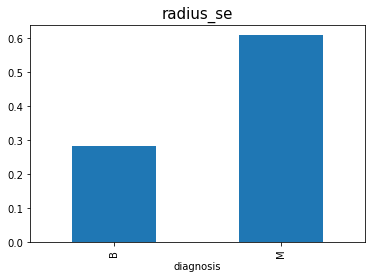

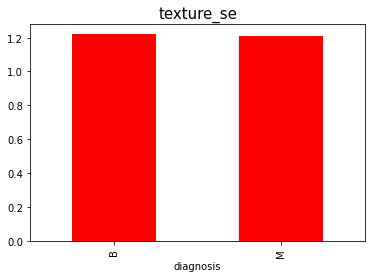

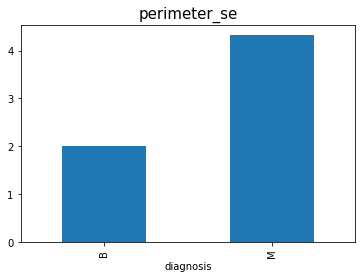

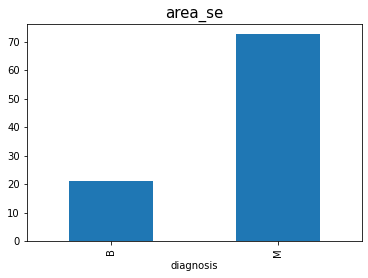

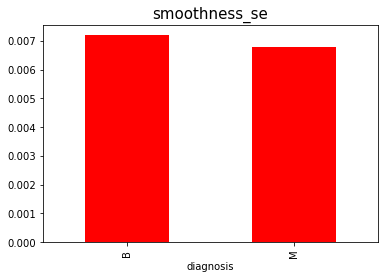

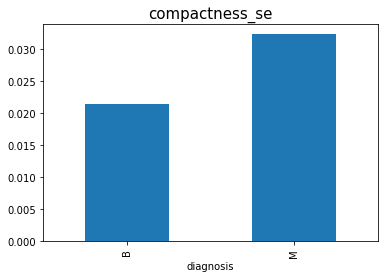

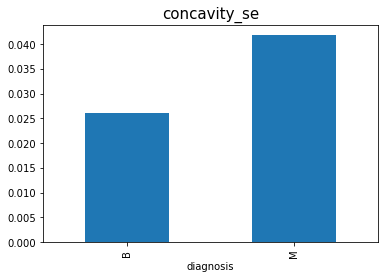

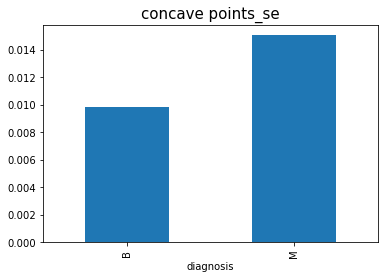

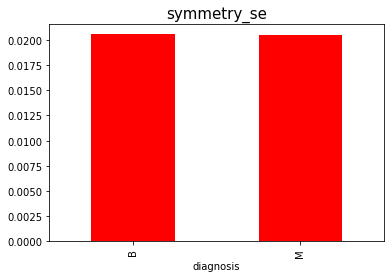

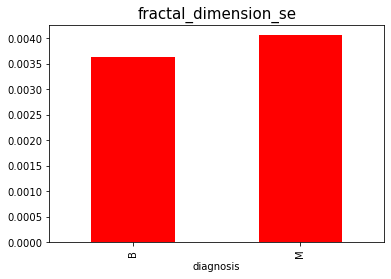

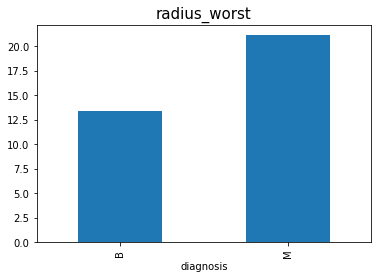

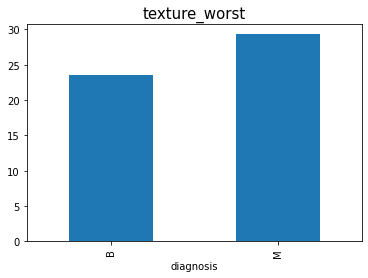

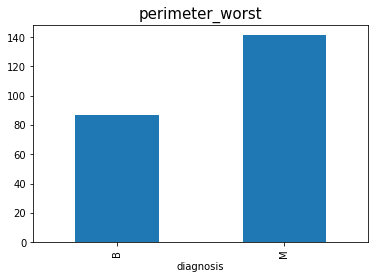

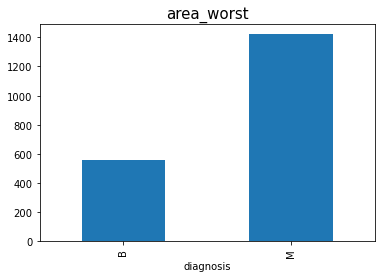

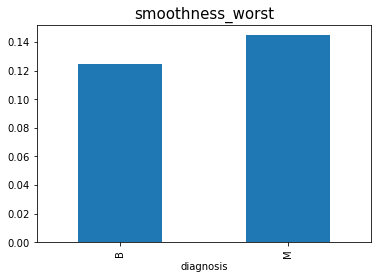

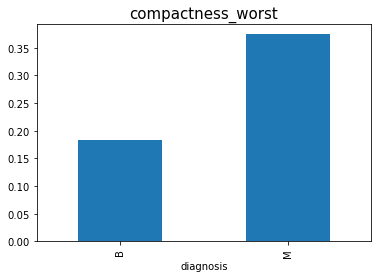

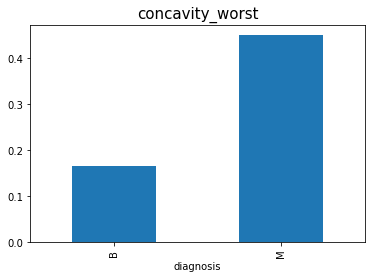

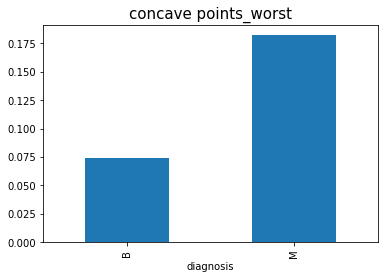

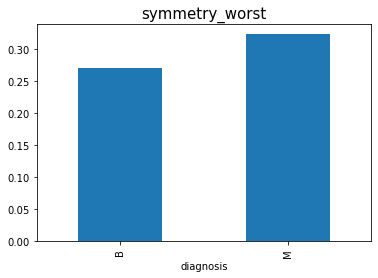

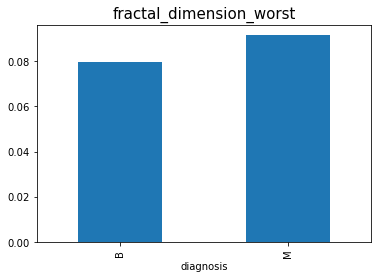

In [16]:
#  Lets visualize the same
for i in num_features_:
    if i in not_imp_features:
        df1.groupby('diagnosis')[i].mean().plot(kind='bar',color='r')
        plt.title(i,size=15)
        plt.show()
    else:
        df1.groupby('diagnosis')[i].mean().plot(kind='bar',)
        plt.title(i,size=15)
        plt.show()
#     plt.show()

- Yes from visualization also we can see those non important_features
- So we will move with only important features for further anlysis

In [17]:
df2=df1[imp_features+['diagnosis']].copy()
df1.shape,df2.shape

((569, 31), (569, 26))

In [18]:
df2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,8.589,153.40,0.04904,0.05373,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,3.398,74.08,0.01308,0.01860,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,4.585,94.03,0.04006,0.03832,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,3.445,27.23,0.07458,0.05661,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,5.438,94.44,0.02461,0.05688,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


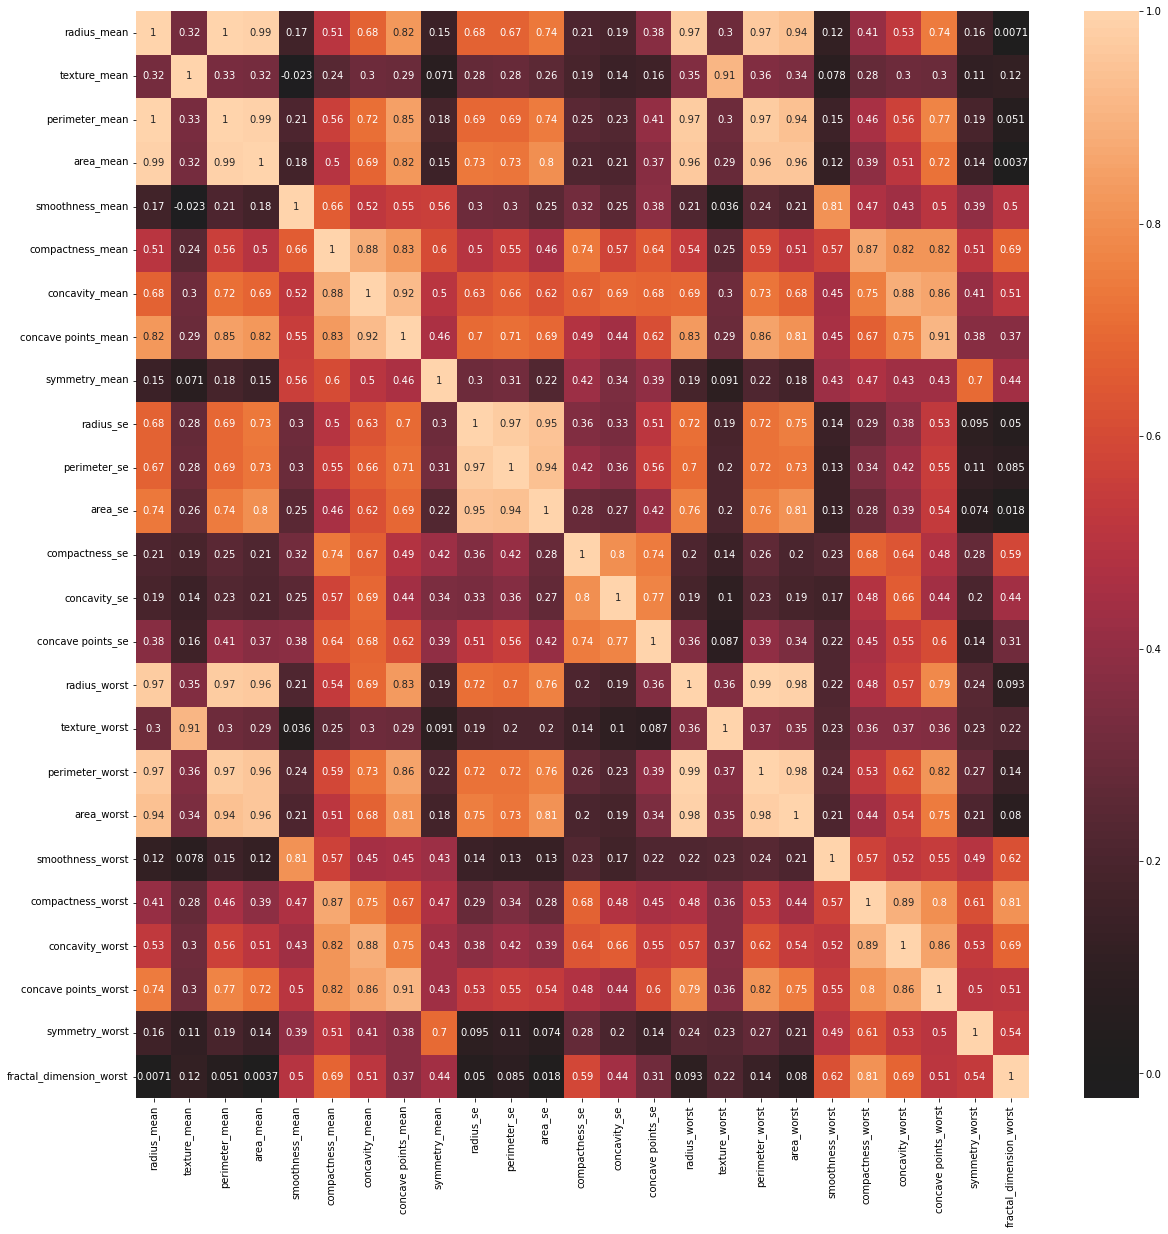

In [19]:
#  checking multicollinearity
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True,center=0,)
plt.show()

- There is multicollinearity in the data
- To avoid this we use PCA technique

In [20]:
# splitting the data
df2['diagnosis']=df2['diagnosis'].map({'M':0,'B':1})

In [21]:
x=df2.drop('diagnosis',axis=1)
y=df2['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

<IPython.core.display.Javascript object>

### Feature Engineering

##### Scaling the data

In [22]:
scale=StandardScaler()
scale.fit(x_train)
x_train_scale=scale.transform(x_train)
x_test_scale=scale.transform(x_test)

In [23]:
pc=PCA(n_components=0.99)
pc_df=pc.fit(x_train_scale)

In [24]:
x_train_pca=pc_df.transform(x_train_scale)
x_test_pca=pc_df.transform(x_test_scale)

In [25]:
x_train_pca.shape,x_test_pca.shape

((398, 14), (171, 14))

### Only 14 pca are able to explain 99% variation in the data

In [26]:
cols=[]
for i in range(1,15):
    cols.append('PC'+str(i))

In [27]:
x_train_pca_df=pd.DataFrame(x_train_pca,columns=cols)
x_test_pca_df=pd.DataFrame(x_test_pca,columns=cols)

In [28]:
x_train_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.393081,2.610739,0.213196,-0.585490,0.808892,-1.946557,0.426493,-0.090105,-0.474210,-0.220585,0.223690,-0.421429,0.037569,-0.049052
1,-4.730768,-2.956402,-1.118099,3.430314,0.512043,-1.090118,-0.834534,-0.359087,0.593266,0.087397,-1.007638,-0.060348,0.141376,0.159161
2,-3.980057,0.191013,0.780870,0.202004,1.332496,1.717330,1.045112,-0.566692,0.575140,-0.705741,0.954762,-0.218037,-0.341548,0.138412
3,-2.334737,-0.028892,-0.376478,-0.077800,0.110825,-0.157536,0.443825,-0.262742,-0.290458,0.195127,0.112827,-0.059023,-0.279433,-0.007700
4,-3.116358,0.763893,0.362753,-1.689012,-0.436727,-0.214308,0.192414,-0.043370,-0.051571,-0.241598,0.082654,0.035226,0.090922,-0.000040


In [29]:
x_test_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,3.775240,4.984076,-1.558672,1.107562,-1.380064,-0.158794,-0.819858,-1.077173,-0.122832,-0.325748,0.075934,-0.002750,-0.096498,-0.005899
1,-1.307517,0.336572,-0.129163,-1.142229,2.739049,0.677921,1.405177,-0.639603,0.384320,0.102618,0.670595,-0.003599,-0.797094,-0.564039
2,-1.134154,0.042088,1.610133,-1.661176,2.405788,-1.751933,0.924275,-0.826368,-0.357062,-0.619039,-0.374900,0.072322,-0.394737,-0.213966
3,4.767483,-0.952162,0.123219,0.774828,0.356542,-2.118409,0.043013,-2.397224,-0.419875,0.681457,-0.307453,0.592185,0.645841,0.519294
4,0.648441,0.089802,0.581269,0.738299,0.851873,0.305765,1.256764,0.091221,-0.106792,-0.114493,0.113949,-0.463733,-0.155346,-0.012764


In [30]:
x_train_pca_df.shape,y_train.shape

((398, 14), (398,))

In [31]:
x_test_pca_df.shape,y_test.shape

((171, 14), (171,))

In [32]:
x_train_pca_df['Target']=y_train.values
x_test_pca_df['Target']=y_test.values

## Model building

In [35]:


class Model_Selector:
    '''this class help to select
    suitable model for given data frame.
    the models used are
    a) Logistic regression
    b)KNN classifier
    c)Decision tree
    d)Random forest
    e)Adaboostclassifier
    f)gradient boost classifier
    g)xgboost classifier
    h) Lighgbm
    i)catboost'''

    def __init__(self):
        self.model_used=[LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,
        AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier,CatBoostClassifier]
        self.model_names=['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier',
                         'AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','LGBMClassifier','CatBoostClassifier']
    
    
    def model_performances(self,dataframe,label,normalize=False):    
       #------Defining X and y------
        logging.info('Defining X and y')
        x=dataframe.drop(label,axis=1)
        y=dataframe[label]
        
        
       # -------splitting data-------
        logging.info('Splitting data into train and test')
        x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)
       
    #  scaling the data if normalize=True 
        if normalize==True:
            logging.info('Normalizing the data')
            scale=StandardScaler()
            scale.fit(x_train)
            x_train_scaled=scale.transform(x_train)
            x_test_scaled=scale.transform(x_test)
        
        else:
            pass
        print(x_train.shape,x_test.shape) 
       #------- Data frmale of model performance---------
        model_performance=pd.DataFrame({'model_name':[],'accuracy':[],'Precision score':[],'Recall score':[],'f1_score':[]})
        
       #--------- fitting different models---------
        ind=0
        for Model in tqdm(self.model_used):
            model=Model()
            model.fit(x_train.values,y_train)
            logging.info(f'{self.model_names[ind]} model fitted')
            y_pred=model.predict(x_test.values)
            if y.nunique()==2:

                
                y_test=np.array(y_test).reshape(-1,1)
                y_pred=y_pred.reshape(-1,1)
                accuracy=accuracy_score(y_test,y_pred)
                precision=precision_score(y_test,y_pred)
                recall=recall_score(y_test,y_pred)
                f1=f1_score(y_test,y_pred)
            elif y.nunique()>2:
                accuracy=accuracy_score(y_test,y_pred)
                precision=precision_score(y_test,y_pred,average='weighted')
                recall=recall_score(y_test,y_pred,average='weighted')
                f1=f1_score(y_test,y_pred,average='weighted')
                
            model_performance.loc[ind]=[self.model_names[ind],accuracy,precision,recall,f1]
            print(self.model_names[ind],'model fitted')
            ind+=1
        logging.info('All models fitted')
        self.model_performance=model_performance
        return model_performance.style.highlight_max(subset = model_performance.columns[1:],
                       color = 'lightgreen', axis = 0)
    
    
    def select_best_model(self,based_on='accuracy'):
        '''based_on=['accuracy','Precision score','Recall score','f1_score']'''
        logging.info(f'selecting best model based on {based_on}')
        self.best_model_ind=self.model_performance[self.model_performance[based_on]==self.model_performance[based_on].max()].index[0]
        return self.model_names[self.best_model_ind]
            
        
    def plot_model_performance(self):
        logging.info('Plotting model performances')
        self.model_performance.plot(figsize=(20,8),marker='o')
        plt.xticks(range(len(self.model_performance)),self.model_performance['model_name'].values)
        plt.xticks(rotation=45)
        plt.show()


In [36]:
m=Model_Selector()
m.model_performances(x_train_pca_df,'Target',normalize=False)

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 436, in format
    return self._format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 432, in _format
    return self._fmt % record.__dict__
KeyError: 'model'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 1081, in emit
    msg = self.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 925, in format
    return fmt.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 667, in format
    s = self.formatMessage(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 636, in formatMessage
    return self._style.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 438, in format
    raise ValueError('Formatting field not found 

<IPython.core.display.Javascript object>

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 436, in format
    return self._format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 432, in _format
    return self._fmt % record.__dict__
KeyError: 'model'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 1081, in emit
    msg = self.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 925, in format
    return fmt.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 667, in format
    s = self.formatMessage(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 636, in formatMessage
    return self._style.format(record)
  File "C:

(278, 14) (120, 14)
LogisticRegression model fitted
KNeighborsClassifier model fitted
DecisionTreeClassifier model fitted


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 436, in format
    return self._format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 432, in _format
    return self._fmt % record.__dict__
KeyError: 'model'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 1081, in emit
    msg = self.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 925, in format
    return fmt.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 667, in format
    s = self.formatMessage(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 636, in formatMessage
    return self._style.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 438, in format
    raise ValueError('Formatting field not found 

RandomForestClassifier model fitted
AdaBoostClassifier model fitted


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 436, in format
    return self._format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 432, in _format
    return self._fmt % record.__dict__
KeyError: 'model'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 1081, in emit
    msg = self.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 925, in format
    return fmt.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 667, in format
    s = self.formatMessage(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 636, in formatMessage
    return self._style.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 438, in format
    raise ValueError('Formatting field not found 

GradientBoostingClassifier model fitted


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 436, in format
    return self._format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 432, in _format
    return self._fmt % record.__dict__
KeyError: 'model'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 1081, in emit
    msg = self.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 925, in format
    return fmt.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 667, in format
    s = self.formatMessage(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 636, in formatMessage
    return self._style.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 438, in format
    raise ValueError('Formatting field not found 

[12:17:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier model fitted


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 436, in format
    return self._format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 432, in _format
    return self._fmt % record.__dict__
KeyError: 'model'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 1081, in emit
    msg = self.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 925, in format
    return fmt.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 667, in format
    s = self.formatMessage(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 636, in formatMessage
    return self._style.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 438, in format
    raise ValueError('Formatting field not found 

LGBMClassifier model fitted
Learning rate set to 0.005964
0:	learn: 0.6849741	total: 177ms	remaining: 2m 56s
1:	learn: 0.6771450	total: 182ms	remaining: 1m 30s
2:	learn: 0.6699226	total: 188ms	remaining: 1m 2s
3:	learn: 0.6624997	total: 193ms	remaining: 48.1s
4:	learn: 0.6551767	total: 197ms	remaining: 39.2s
5:	learn: 0.6482344	total: 200ms	remaining: 33.2s
6:	learn: 0.6414602	total: 203ms	remaining: 28.8s
7:	learn: 0.6328432	total: 206ms	remaining: 25.5s
8:	learn: 0.6255673	total: 208ms	remaining: 22.9s
9:	learn: 0.6195725	total: 211ms	remaining: 20.9s
10:	learn: 0.6125705	total: 213ms	remaining: 19.2s
11:	learn: 0.6049967	total: 216ms	remaining: 17.7s
12:	learn: 0.5973285	total: 219ms	remaining: 16.6s
13:	learn: 0.5890865	total: 221ms	remaining: 15.6s
14:	learn: 0.5836000	total: 224ms	remaining: 14.7s
15:	learn: 0.5779927	total: 226ms	remaining: 13.9s
16:	learn: 0.5718572	total: 229ms	remaining: 13.2s
17:	learn: 0.5655195	total: 231ms	remaining: 12.6s
18:	learn: 0.5603793	total: 234m

201:	learn: 0.1378412	total: 679ms	remaining: 2.68s
202:	learn: 0.1368424	total: 682ms	remaining: 2.68s
203:	learn: 0.1360187	total: 685ms	remaining: 2.67s
204:	learn: 0.1353812	total: 688ms	remaining: 2.67s
205:	learn: 0.1348811	total: 691ms	remaining: 2.66s
206:	learn: 0.1342796	total: 695ms	remaining: 2.66s
207:	learn: 0.1335994	total: 698ms	remaining: 2.66s
208:	learn: 0.1329347	total: 701ms	remaining: 2.65s
209:	learn: 0.1321170	total: 703ms	remaining: 2.64s
210:	learn: 0.1313296	total: 706ms	remaining: 2.64s
211:	learn: 0.1303780	total: 708ms	remaining: 2.63s
212:	learn: 0.1295329	total: 711ms	remaining: 2.63s
213:	learn: 0.1289107	total: 713ms	remaining: 2.62s
214:	learn: 0.1283717	total: 716ms	remaining: 2.61s
215:	learn: 0.1277526	total: 718ms	remaining: 2.61s
216:	learn: 0.1272196	total: 721ms	remaining: 2.6s
217:	learn: 0.1265767	total: 723ms	remaining: 2.59s
218:	learn: 0.1258204	total: 725ms	remaining: 2.59s
219:	learn: 0.1251975	total: 729ms	remaining: 2.58s
220:	learn: 0

374:	learn: 0.0665724	total: 1.16s	remaining: 1.94s
375:	learn: 0.0662920	total: 1.17s	remaining: 1.94s
376:	learn: 0.0661224	total: 1.17s	remaining: 1.93s
377:	learn: 0.0658836	total: 1.17s	remaining: 1.93s
378:	learn: 0.0657060	total: 1.17s	remaining: 1.92s
379:	learn: 0.0655027	total: 1.17s	remaining: 1.92s
380:	learn: 0.0653749	total: 1.18s	remaining: 1.91s
381:	learn: 0.0651757	total: 1.18s	remaining: 1.91s
382:	learn: 0.0649794	total: 1.18s	remaining: 1.9s
383:	learn: 0.0646398	total: 1.18s	remaining: 1.9s
384:	learn: 0.0644329	total: 1.19s	remaining: 1.9s
385:	learn: 0.0642146	total: 1.19s	remaining: 1.89s
386:	learn: 0.0640702	total: 1.19s	remaining: 1.89s
387:	learn: 0.0637708	total: 1.2s	remaining: 1.89s
388:	learn: 0.0636513	total: 1.2s	remaining: 1.88s
389:	learn: 0.0634394	total: 1.2s	remaining: 1.88s
390:	learn: 0.0632626	total: 1.2s	remaining: 1.88s
391:	learn: 0.0630840	total: 1.21s	remaining: 1.87s
392:	learn: 0.0627818	total: 1.21s	remaining: 1.87s
393:	learn: 0.06259

548:	learn: 0.0410549	total: 1.64s	remaining: 1.35s
549:	learn: 0.0410213	total: 1.65s	remaining: 1.34s
550:	learn: 0.0409727	total: 1.65s	remaining: 1.34s
551:	learn: 0.0408932	total: 1.65s	remaining: 1.34s
552:	learn: 0.0407895	total: 1.65s	remaining: 1.34s
553:	learn: 0.0406769	total: 1.66s	remaining: 1.33s
554:	learn: 0.0405789	total: 1.66s	remaining: 1.33s
555:	learn: 0.0405062	total: 1.66s	remaining: 1.32s
556:	learn: 0.0403891	total: 1.66s	remaining: 1.32s
557:	learn: 0.0402838	total: 1.67s	remaining: 1.32s
558:	learn: 0.0401957	total: 1.67s	remaining: 1.32s
559:	learn: 0.0400905	total: 1.67s	remaining: 1.31s
560:	learn: 0.0399818	total: 1.67s	remaining: 1.31s
561:	learn: 0.0398678	total: 1.68s	remaining: 1.31s
562:	learn: 0.0397833	total: 1.68s	remaining: 1.3s
563:	learn: 0.0396882	total: 1.68s	remaining: 1.3s
564:	learn: 0.0396096	total: 1.69s	remaining: 1.3s
565:	learn: 0.0394746	total: 1.69s	remaining: 1.29s
566:	learn: 0.0393863	total: 1.69s	remaining: 1.29s
567:	learn: 0.0

719:	learn: 0.0288369	total: 2.11s	remaining: 822ms
720:	learn: 0.0287715	total: 2.12s	remaining: 819ms
721:	learn: 0.0287125	total: 2.12s	remaining: 816ms
722:	learn: 0.0286274	total: 2.12s	remaining: 813ms
723:	learn: 0.0285776	total: 2.13s	remaining: 810ms
724:	learn: 0.0285102	total: 2.13s	remaining: 807ms
725:	learn: 0.0284481	total: 2.13s	remaining: 804ms
726:	learn: 0.0283696	total: 2.13s	remaining: 801ms
727:	learn: 0.0283073	total: 2.13s	remaining: 798ms
728:	learn: 0.0282554	total: 2.14s	remaining: 795ms
729:	learn: 0.0281963	total: 2.14s	remaining: 793ms
730:	learn: 0.0281443	total: 2.15s	remaining: 790ms
731:	learn: 0.0280889	total: 2.15s	remaining: 787ms
732:	learn: 0.0280324	total: 2.15s	remaining: 784ms
733:	learn: 0.0279579	total: 2.15s	remaining: 781ms
734:	learn: 0.0278947	total: 2.16s	remaining: 778ms
735:	learn: 0.0278435	total: 2.16s	remaining: 775ms
736:	learn: 0.0277585	total: 2.16s	remaining: 772ms
737:	learn: 0.0277061	total: 2.17s	remaining: 769ms
738:	learn: 

897:	learn: 0.0206231	total: 2.6s	remaining: 295ms
898:	learn: 0.0205897	total: 2.6s	remaining: 292ms
899:	learn: 0.0205336	total: 2.6s	remaining: 289ms
900:	learn: 0.0204865	total: 2.6s	remaining: 286ms
901:	learn: 0.0204377	total: 2.61s	remaining: 283ms
902:	learn: 0.0203905	total: 2.61s	remaining: 280ms
903:	learn: 0.0203454	total: 2.61s	remaining: 277ms
904:	learn: 0.0203135	total: 2.61s	remaining: 274ms
905:	learn: 0.0202813	total: 2.62s	remaining: 271ms
906:	learn: 0.0202471	total: 2.62s	remaining: 268ms
907:	learn: 0.0202036	total: 2.62s	remaining: 266ms
908:	learn: 0.0201856	total: 2.62s	remaining: 263ms
909:	learn: 0.0201668	total: 2.63s	remaining: 260ms
910:	learn: 0.0201360	total: 2.63s	remaining: 257ms
911:	learn: 0.0201066	total: 2.63s	remaining: 254ms
912:	learn: 0.0200499	total: 2.63s	remaining: 251ms
913:	learn: 0.0199925	total: 2.64s	remaining: 248ms
914:	learn: 0.0199633	total: 2.64s	remaining: 245ms
915:	learn: 0.0199361	total: 2.64s	remaining: 242ms
916:	learn: 0.01

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 436, in format
    return self._format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 432, in _format
    return self._fmt % record.__dict__
KeyError: 'model'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 1081, in emit
    msg = self.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 925, in format
    return fmt.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 667, in format
    s = self.formatMessage(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 636, in formatMessage
    return self._style.format(record)
  File "C:\Users\HP\anaconda3_new\lib\logging\__init__.py", line 438, in format
    raise ValueError('Formatting field not found 

CatBoostClassifier model fitted


,model_name,accuracy,Precision score,Recall score,f1_score
0,LogisticRegression,0.975000,0.961538,1.000000,0.980392
1,KNeighborsClassifier,0.958333,0.960526,0.973333,0.966887
2,DecisionTreeClassifier,0.875000,0.905405,0.893333,0.899329
3,RandomForestClassifier,0.925000,0.934211,0.946667,0.940397
4,AdaBoostClassifier,0.925000,0.945946,0.933333,0.939597
5,GradientBoostingClassifier,0.925000,0.958333,0.920000,0.938776
6,XGBClassifier,0.950000,0.960000,0.960000,0.960000
7,LGBMClassifier,0.950000,0.972603,0.946667,0.959459
8,CatBoostClassifier,0.933333,0.946667,0.946667,0.946667


## We select the logistic regression 

In [37]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9590643274853801

In [47]:
y_pred=model.predict(x_test)

In [44]:
y_test

14     0
150    1
275    1
83     0
86     0
      ..
37     1
358    1
363    1
171    0
284    1
Name: diagnosis, Length: 171, dtype: int64

### Model performance

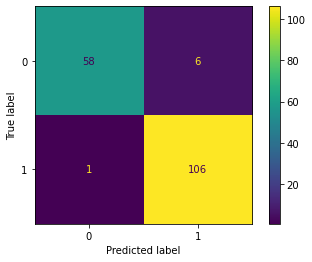

In [46]:
# Confussion matrixs
plot_confusion_matrix(estimator=model,X=x_test,y_true=y_test)
plt.show()

In [51]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

